# Lab3:图像分割

In [15]:
import numpy as np
import random
from skimage import data
from skimage import io
import matplotlib.pyplot as plt

In [12]:
def loss_function(present_center, pre_center):
  '''
  损失函数，计算上一次与当前聚类中的差异（像素差的平方和）
  :param present_center: 当前聚类中心
  :param pre_center: 上一次聚类中心
  :return:　损失值
  '''
  present_center = np.array(present_center)
  pre_center = np.array(pre_center)
  return np.sum((present_center - pre_center)**2)


In [4]:
def classifer(intput_signal, center):
  '''
  分类器（通过当前的聚类中心，给输入图像分类）
  :param intput_signal: 输入图像
  :param center: 聚类中心
  :return:　标签矩阵
  '''
  input_row, input_col= intput_signal.shape # 输入图像的尺寸

  pixls_labels = np.zeros((input_row, input_col)) # 储存所有像素标签

  pixl_distance_t = [] # 单个元素与所有聚类中心的距离，临时用

  for i in range(input_row):
    for j in range(input_col):
      # 计算每个像素与所有聚类中心的差平方
      for k in range(len(center)):
        distance_t = np.sum(abs((intput_signal[i, j]).astype(int) - center[k].astype(int))**2)
        pixl_distance_t.append(distance_t)
      # 差异最小则为该类
      pixls_labels[i, j] = int(pixl_distance_t.index(min(pixl_distance_t)))
      # 清空该list，为下一个像素点做准备
      pixl_distance_t = []
  return pixls_labels


In [5]:
def k_means(input_signal, center_num, threshold):
  '''
  基于k-means算法的图像分割（适用于灰度图）
  :param input_signal:　输入图像
  :param center_num:　聚类中心数目
  :param threshold:　迭代阈值
  :return:
  '''
  input_signal_cp = np.copy(input_signal) # 输入信号的副本
  input_row, input_col = input_signal_cp.shape # 输入图像的尺寸
  pixls_labels = np.zeros((input_row, input_col)) # 储存所有像素标签

  # 随机初始聚类中心行标与列标
  initial_center_row_num = [i for i in range(input_row)]
  random.shuffle(initial_center_row_num)
  initial_center_row_num = initial_center_row_num[:center_num]

  initial_center_col_num = [i for i in range(input_col)]
  random.shuffle(initial_center_col_num)
  initial_center_col_num = initial_center_col_num[:center_num]

  # 当前的聚类中心
  present_center = []
  for i in range(center_num):
    present_center.append(input_signal_cp[initial_center_row_num[i], initial_center_row_num[i]])
  pixls_labels = classifer(input_signal_cp, present_center)

  num = 0 # 用于记录迭代次数
  while True:
    pre_centet = present_center.copy() # 储存前一次的聚类中心
    # 计算当前聚类中心
    for n in range(center_num):
      temp = np.where(pixls_labels == n)
      present_center[n] = sum(input_signal_cp[temp].astype(int)) / len(input_signal_cp[temp])
    # 根据当前聚类中心分类
    pixls_labels = classifer(input_signal_cp, present_center)
    # 计算上一次聚类中心与当前聚类中心的差异
    loss = loss_function(present_center, pre_centet)
    num = num + 1
    print("Step:"+ str(num) + "  Loss:" + str(loss))
    # 当损失小于迭代阈值时，结束迭代
    if loss <= threshold:
      break
  return pixls_labels

Step:1  Loss:9172.17225580165
Step:2  Loss:782.801481462714
Step:3  Loss:6.26652576245626
Step:4  Loss:3.317463030123813
Step:5  Loss:4.619937445506946
Step:6  Loss:4.610347341541741
Step:7  Loss:5.807143589932791
Step:8  Loss:34.28622180226267
Step:9  Loss:47.60193709930494
Step:10  Loss:39.29125777082828
Step:11  Loss:21.350769874281113
Step:12  Loss:21.109841042925243
Step:13  Loss:13.21198300205167
Step:14  Loss:7.492751874254629
Step:15  Loss:5.656029617276383
Step:16  Loss:7.703985427668638
Step:17  Loss:1.7822892771783234
Step:18  Loss:1.926724780494476
Step:19  Loss:1.1586321251238483
Step:20  Loss:2.0134232990813414
Step:21  Loss:0.0


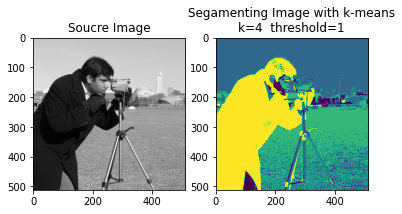

In [17]:

if __name__ == '__main__':
    # data.coins() 
    image = data.camera()
    k = 4
    threshold = 1
    labels = k_means(image, k, threshold)

    plt.subplot(1, 2, 1)
    plt.title("Soucre Image")
    plt.imshow(image,cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Segamenting Image with k-means\n" + "k=" + str(k) + "  threshold=" + str(threshold))
    plt.imshow(labels/3)
    plt.show()

### 调用库函数实现的过程更加简洁

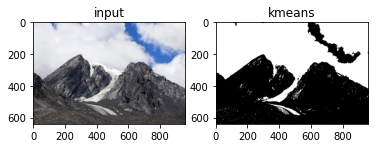

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
 
def seg_kmeans_color():
    img = cv2.imread('snow.jpg', cv2.IMREAD_COLOR)
    # 变换图像通道bgr->rgb
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
 
    # 3个通道展平
    img_flat = img.reshape((img.shape[0] * img.shape[1], 3))
    img_flat = np.float32(img_flat)
 
    # 迭代参数
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 20, 0.5)
    flags = cv2.KMEANS_RANDOM_CENTERS
 
    # 聚类,这里k=2
    compactness, labels, centers = cv2.kmeans(img_flat, 2, None, criteria, 10, flags)
 
    # 显示结果
    img_output = labels.reshape((img.shape[0], img.shape[1]))
    plt.subplot(121), plt.imshow(img), plt.title('input')
    plt.subplot(122), plt.imshow(img_output, 'gray'), plt.title('kmeans')
    plt.show()
 
 
if __name__ == '__main__':
    seg_kmeans_color()